In [246]:
###### test on 1d line in 3d space ######

In [247]:
%matplotlib widget  # For 3d interactive plotting 

UsageError: unrecognized arguments: # For 3d interactive plotting


In [248]:
import keras
from keras import layers

In [249]:
def square_root(t): # first example
    x = t 
    y = np.sqrt(t)
    return np.array([x,y])

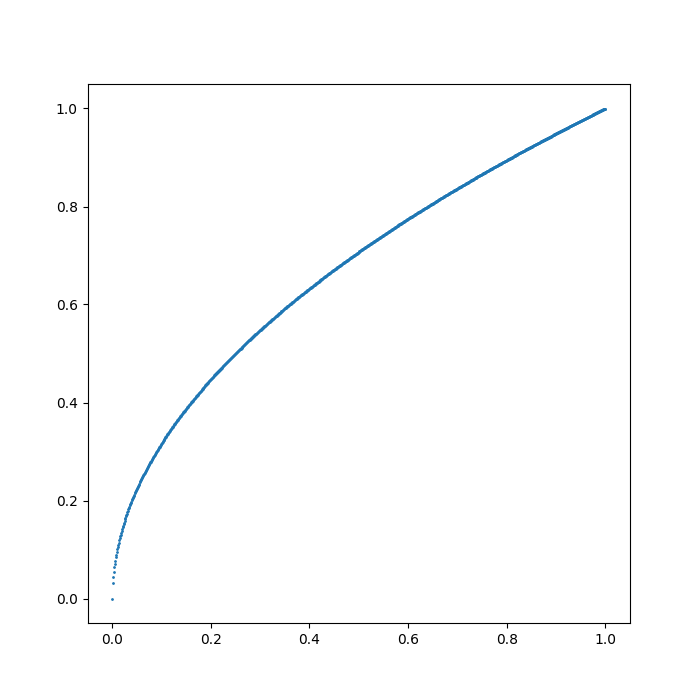

In [250]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

t = np.linspace(0,1,1000)
x,y = square_root(t)

plt.figure(figsize=(7,7))
plt.scatter(x,y,s=1)
plt.show()

In [319]:
encoding_dim = 1  # size of the throat : dimension of the underlying manifold

input_points = keras.Input(shape=(2,)) # 2 is the dimension of the total space 

x = layers.Dense(2, activation='sigmoid')(input_points)
#x = layers.Dense(16, activation='sigmoid')(x)
encoded = layers.Dense(encoding_dim, activation = 'sigmoid')(x)


#x = layers.Dense(16, activation='sigmoid')(encoded)
x = layers.Dense(2, activation='sigmoid')(encoded)
decoded = layers.Dense(2, activation = 'sigmoid')(x)

autoencoder = keras.Model(input_points, decoded)

In [320]:
autoencoder.summary() #symmetric encoder 

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [321]:
encoder = keras.Model(input_points, encoded) # the encoder 


In [322]:
t = np.linspace(0,1,100000)
x,y = square_root(t)
set_all = np.array([x,y],dtype=float).T
print(set_all.shape)
mask_train = np.array([np.random.rand()<0.9 for i in range(100000)])
set_train = np.array([np.extract(mask_train,set_all[:,i]) for i in range(2)]).T
set_test = np.array([np.extract(1-mask_train,set_all[:,i]) for i in range(2)]).T
print(set_train.shape)
print(set_test.shape)

(100000, 2)
(89984, 2)
(10016, 2)


In [323]:
encoded_input = keras.Input(shape=(encoding_dim,))

In [324]:
autoencoder.compile(optimizer='adam', loss='mse')

In [325]:
history = autoencoder.fit(set_train, set_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_data=(set_test, set_test))

Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0691 - val_loss: 0.0673
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0645 - val_loss: 0.0429
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0325 - val_loss: 0.0125
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0016 - val_loss: 9.7182e-04
Epoch 9/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.7127e-04 - val_loss: 5.8788e-04
Epoch 10/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.5904e-04 - val_loss: 4.0909e-04
Epoch 11/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9774e-04 - val_loss: 3.2812e-04
Epoch 12/100


900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3470e-05 - val_loss: 7.0638e-05
Epoch 65/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2880e-05 - val_loss: 6.9604e-05
Epoch 66/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3526e-05 - val_loss: 6.8883e-05
Epoch 67/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.1904e-05 - val_loss: 6.8193e-05
Epoch 68/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.1529e-05 - val_loss: 6.7297e-05
Epoch 69/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0885e-05 - val_loss: 6.7548e-05
Epoch 70/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0310e-05 - val_loss: 6.6455e-05
Epoch 71/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9634e-05 - val_loss: 6.5665e-05
Epoch 72/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8269e-05 - val_loss: 6.5714e-05
Epoch 73/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9491e-05 - val_loss: 6.4542e-05
Epoch 74/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [326]:
encoded_points = encoder.predict(set_test)
decoded_points = autoencoder.predict(set_test) # points that have been encoded and then decoded. set_test are not 
#part of the training set, so the autoencoder never encountered them before. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


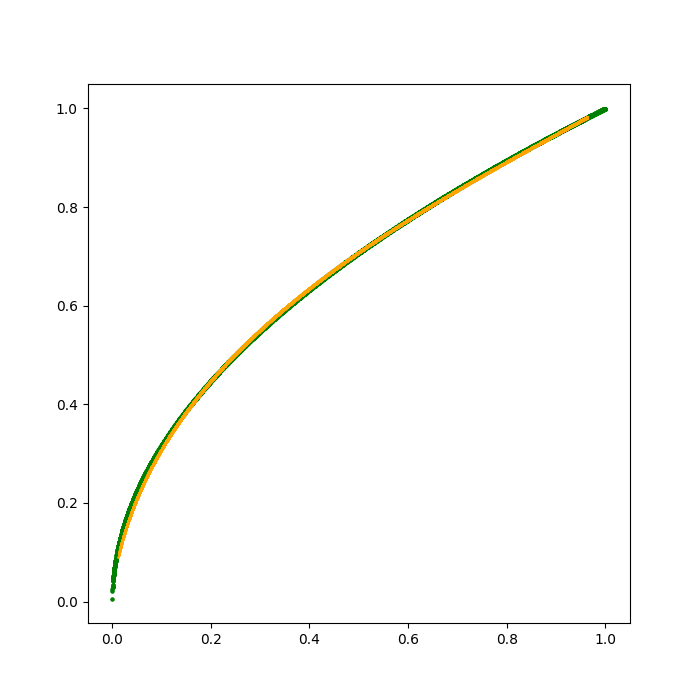

In [327]:
plt.figure(figsize = (7,7))  
                
plt.scatter(set_test[:,0], set_test[:,1],color="green",s=5) 
plt.scatter(decoded_points[:,0],decoded_points[:,1],s=1,c='orange')

plt.show()

In [331]:
# not perfect but I managed at some point to do better with different architecture. I got really nice feat. 
# I forgot to write them down :) 
# Still shows that it works and something is going on. 

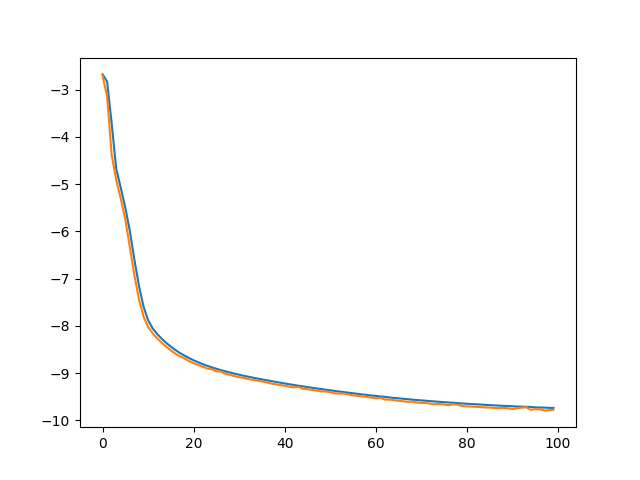

In [333]:
plt.figure()
plt.plot(np.log(history.history["loss"]))
plt.plot(np.log(history.history["val_loss"]))
plt.show()

#we see that learning stop while loss was still going down, so with longer training we would probably obtain 
#a better result

In [334]:
### helix example
# note that I have tried with larger frequency in the x,y coordinates, but in that case, the autoencoder seems
# only able to reproduce the first circle
# try 20 for example 

In [342]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

period = 6

def helix(t):
    x = np.cos(period * t)
    y = np.sin(period * t)
    z = t
    return np.array([x, y, z])

n_points = 100000  
t_values = np.linspace(0, 1, n_points)  
data = np.array([helix(t) for t in t_values])  

mask_train = np.array([np.random.rand()<0.9 for i in range(100000)])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)



(89987, 3)
(10013, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/2861844402.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


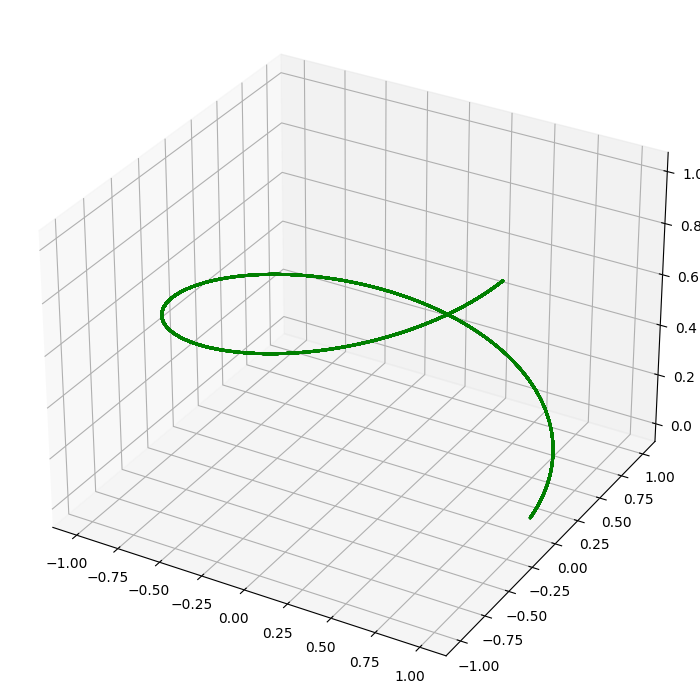

In [343]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data[:,0], data[:,1], data[:,2],color="green",s=1) 

plt.show()

In [355]:
input_dim = 3 # dimension of the total space 

latent_dim = 1  # Dimension of the submanifold

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  

# Auto-encodeur
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [356]:
autoencoder.summary()

Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

In [357]:
# Training auto-encoder
history_helix = autoencoder.fit(data_train, data_train, epochs=100, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1338 - val_loss: 7.0092e-04
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.8669e-04 - val_loss: 1.5126e-04
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2819e-04 - val_loss: 6.0448e-05
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.3462e-05 - val_loss: 3.7467e-05
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.0377e-05 - val_loss: 3.5384e-05
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8455e-05 - val_loss: 1.8077e-05
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2675e-05 - val_loss: 2.4160e-05
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6411e-05 - val_loss: 2.0176e-05
Epoch 9/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3248e-05 - val_loss: 1.9034e-05
Epoch 10/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2297e-05 - val_loss: 1.9830e-05
Epoch 11/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2662e-06 - val_loss: 3.5173e-06
Epoch 65/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.6500e-06 - val_loss: 3.5122e-06
Epoch 66/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2822e-05 - val_loss: 4.0278e-06
Epoch 67/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3671e-05 - val_loss: 5.3018e-06
Epoch 68/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.2029e-06 - val_loss: 4.8494e-06
Epoch 69/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.6932e-06 - val_loss: 4.0605e-06
Epoch 70/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.2967e-06 - val_loss: 1.4571e-05
Epoch 71/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.2677e-06 - val_loss: 3.7999e-06
Epoch 72/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.3115e-06 - val_loss: 4.6697e-06
Epoch 73/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.2101e-06 - val_loss: 5.4851e-06
Epoch 74/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [358]:
# Encoder 
encoder = models.Model(inputs, encoded)

# test autoencoder
encoded_points = encoder.predict(data_test)  # should be t 
reconstructed_points = autoencoder.predict(data_test) # Here a total of 100 epochs of training 


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


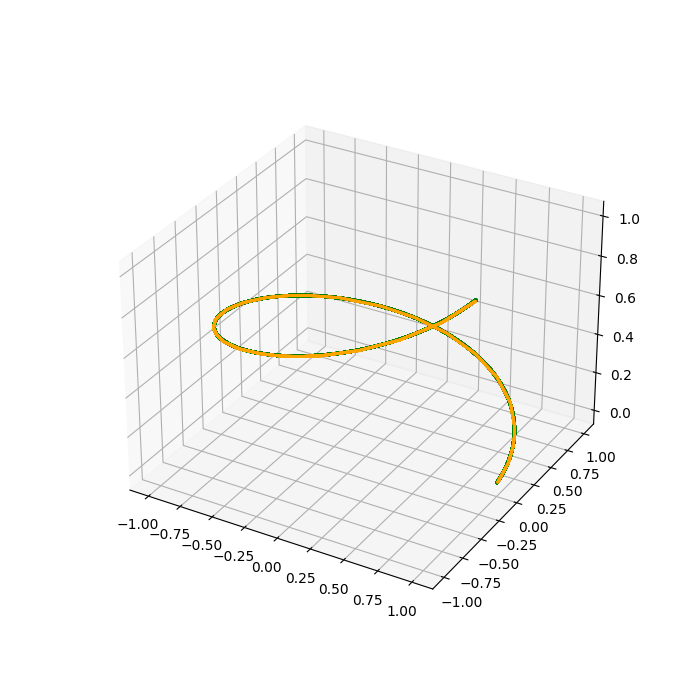

In [359]:
fig = plt.figure(figsize = (7,7)) 

ax = fig.add_subplot(projection='3d')

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=1)

plt.show()

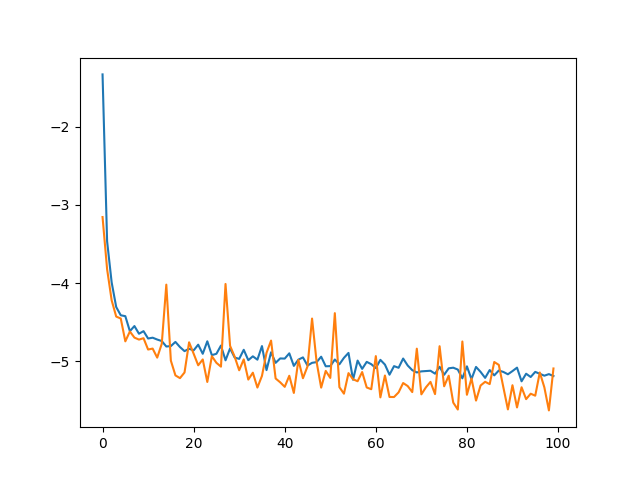

In [360]:
plt.figure()
plt.plot(np.log(history_helix.history["loss"])/np.log(10))
plt.plot(np.log(history_helix.history["val_loss"])/np.log(10))
plt.show()

In [34]:
##### 2d shape in 3d ######

In [361]:
def gaussian(t1,t2):
    x = t1
    y = t2 
    z = np.exp(-(4*(t1-0.5))**2-(4*(t2-0.5))**2)
    return np.array([x,y,z])

In [362]:
n_points = 300  # Nombre de points de l'hélice
t1_values = np.linspace(0, 1, n_points)
t2_values = np.linspace(0, 1, n_points)
data = np.array([gaussian(i,j) for i in t1_values for j in t2_values])
mask_train = np.array([np.random.rand()<0.9 for i in range(data.shape[0])])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)

(81140, 3)
(8860, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/71398858.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


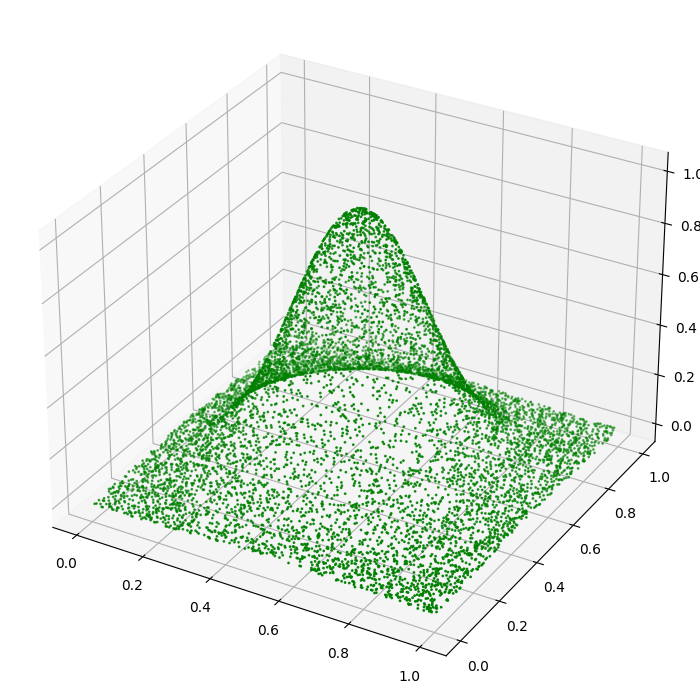

In [369]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=1) 

plt.show()

In [364]:
input_dim = 3  
latent_dim = 2  

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  

# Autoencoder 
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [365]:
autoencoder.summary()

Model: "functional_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621 (6.33 KB)

 Trainable params: 1,621 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [366]:
history_gaussian = autoencoder.fit(data_train, data_train, epochs=100, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0618 - val_loss: 7.4790e-04
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6831e-04 - val_loss: 1.2817e-04
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1379e-04 - val_loss: 7.5824e-05
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3604e-05 - val_loss: 7.3122e-05
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.1001e-05 - val_loss: 5.9329e-05
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0118e-05 - val_loss: 5.0806e-05
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.7049e-05 - val_loss: 4.2298e-05
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.3799e-05 - val_loss: 6.7160e-05
Epoch 9/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.9522e-05 - val_loss: 5.3711e-05
Epoch 10/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8528e-05 - val_loss: 3.6870e-05
Epoch 11/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7759e-05 - val_loss: 1.4771e-05
Epoch 65/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7555e-05 - val_loss: 2.1370e-05
Epoch 66/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9186e-05 - val_loss: 1.4502e-05
Epoch 67/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7068e-05 - val_loss: 1.8847e-05
Epoch 68/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7827e-05 - val_loss: 1.3662e-05
Epoch 69/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7182e-05 - val_loss: 1.8780e-05
Epoch 70/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6757e-05 - val_loss: 1.6313e-05
Epoch 71/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7837e-05 - val_loss: 2.1732e-05
Epoch 72/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7546e-05 - val_loss: 1.3268e-05
Epoch 73/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6627e-05 - val_loss: 1.4134e-05
Epoch 74/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [367]:
encoder = models.Model(inputs, encoded)


In [368]:
encoded_points = encoder.predict(data_test)  
reconstructed_points = autoencoder.predict(data_test) 

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


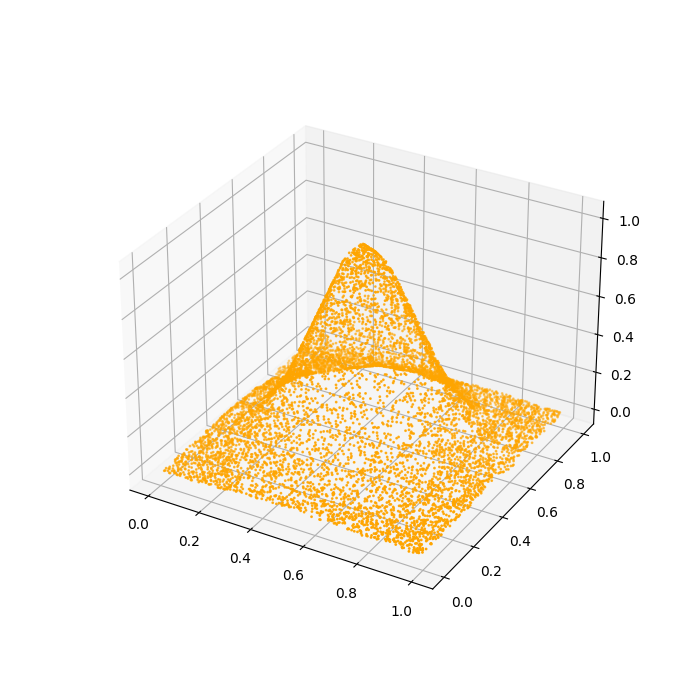

In [373]:
fig = plt.figure(figsize = (7,7)) 

ax = fig.add_subplot(projection='3d')
#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=1)

plt.show()

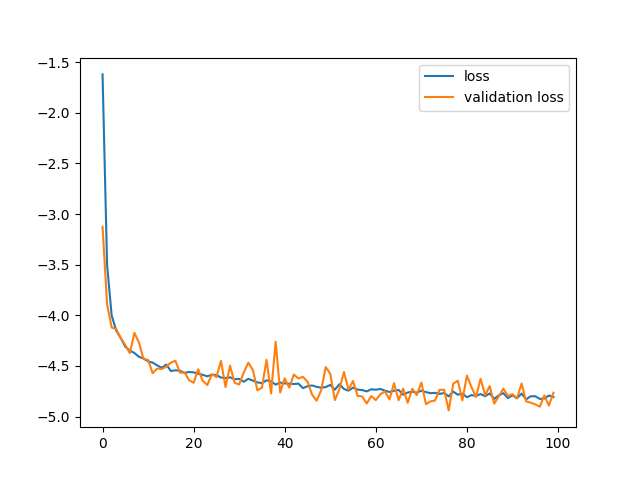

In [377]:
plt.figure()
plt.plot(np.log(history_gaussian.history["loss"])/np.log(10),label="loss")
plt.plot(np.log(history_gaussian.history["val_loss"])/np.log(10),label="validation loss")
plt.legend()
plt.show()

In [378]:
##### 2D sphere ######

In [379]:
def sphere_up(t1, t2):
    x = t1 
    y = t2
    val = 0.25 - (t1 - 0.5) ** 2 - (t2 - 0.5) ** 2
    z = np.sqrt(val) + 0.5 if val >= 0 else 0  # Pour éviter les NaN
    return np.array([x, y, z])

def sphere_down(t1, t2):
    x = t1
    y = t2
    val = 0.25 - (t1 - 0.5) ** 2 - (t2 - 0.5) ** 2
    z = -np.sqrt(val) + 0.5 if val >= 0 else 0  # Pour éviter les NaN
    return np.array([x, y, z])

In [380]:
n_points = 300  # Nombre de points de l'hélice
t1_values = np.linspace(0, 1, n_points)
t2_values = np.linspace(0, 1, n_points)
data = np.array([[sphere_up(i,j),sphere_down(i,j)] for i in t1_values for j in t2_values])
data = data.reshape((2*n_points**2,3))
mask_train = np.array([np.random.rand()<0.9 for i in range(data.shape[0])])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)

(161789, 3)
(18211, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/71398858.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


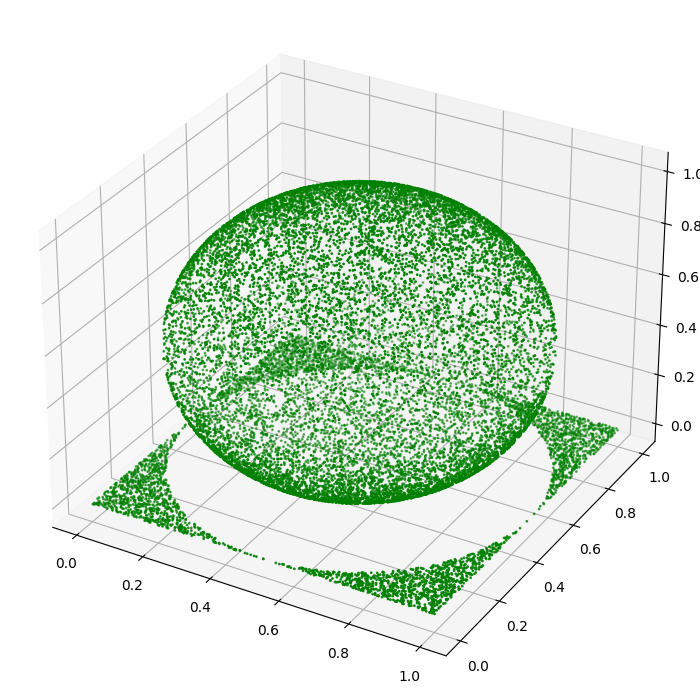

In [381]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=1) 

plt.show()

In [382]:
# Création de l'auto-encodeur
input_dim = 3  # Points de l'hélice (x, y, z)
latent_dim = 2  # Nous voulons réduire à une seule variable (t)

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  # Réduire à une dimension (t)

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  # Reconstruire (x, y, z)

# Modèle auto-encodeur
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [383]:
autoencoder.summary()

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621 (6.33 KB)

 Trainable params: 1,621 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [384]:
history_sphere = autoencoder.fit(data_train, data_train, epochs=200, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0496 - val_loss: 0.0052
Epoch 2/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 3/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.9805e-04 - val_loss: 8.3521e-04
Epoch 5/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.0764e-04 - val_loss: 7.2469e-04
Epoch 6/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.2551e-04 - val_loss: 4.7299e-04
Epoch 7/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2420e-04 - val_loss: 4.0218e-04
Epoch 8/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0460e-04 - val_loss: 4.0341e-04
Epoch 9/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1536e-04 - val_loss: 2.8056e-04
Epoch 10/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4130e-04 - val_loss: 5.4993e-04
Epoch 11/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0459e-04 - val_loss: 3.9827e-04
Epoch 64/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1528e-04 - val_loss: 1.2848e-04
Epoch 65/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2354e-04 - val_loss: 7.7862e-05
Epoch 66/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2500e-04 - val_loss: 1.6403e-04
Epoch 67/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3868e-04 - val_loss: 8.6453e-05
Epoch 68/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1403e-04 - val_loss: 6.8461e-05
Epoch 69/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.6341e-05 - val_loss: 5.8155e-05
Epoch 70/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.4907e-05 - val_loss: 1.1696e-04
Epoch 71/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4351e-04 - val_loss: 1.1671e-04
Epoch 72/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3627e-04 - val_loss: 8.4322e-05
Epoch 73/200
1618/1618 ━━━━━━━━━━

Epoch 125/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6145e-05 - val_loss: 4.9080e-05
Epoch 126/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1915e-05 - val_loss: 4.8063e-05
Epoch 127/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.3575e-05 - val_loss: 7.2046e-05
Epoch 128/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.7603e-05 - val_loss: 1.2120e-04
Epoch 129/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.6664e-05 - val_loss: 5.7190e-05
Epoch 130/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.7618e-05 - val_loss: 3.9535e-05
Epoch 131/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.1754e-05 - val_loss: 3.4248e-05
Epoch 132/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.8574e-05 - val_loss: 5.4105e-05
Epoch 133/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.1506e-05 - val_loss: 3.5595e-05
Epoch 134/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2883e-05 - val_loss: 5.5750e-05
Epoch 135/

1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.7026e-05 - val_loss: 2.7707e-05
Epoch 187/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.3321e-05 - val_loss: 2.4646e-05
Epoch 188/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.0143e-05 - val_loss: 3.9006e-05
Epoch 189/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.0710e-05 - val_loss: 1.0778e-04
Epoch 190/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.2685e-05 - val_loss: 3.1618e-05
Epoch 191/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.0243e-05 - val_loss: 3.2640e-05
Epoch 192/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.4250e-05 - val_loss: 5.5283e-05
Epoch 193/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.7686e-05 - val_loss: 3.9913e-05
Epoch 194/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.8437e-05 - val_loss: 3.0870e-05
Epoch 195/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.2375e-05 - val_loss: 3.5941e-05
Epoch 196/200
1618/1618 

In [385]:
encoder = models.Model(inputs, encoded)

In [386]:
encoded_points = encoder.predict(data_test)  
reconstructed_points = autoencoder.predict(data_test)  

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


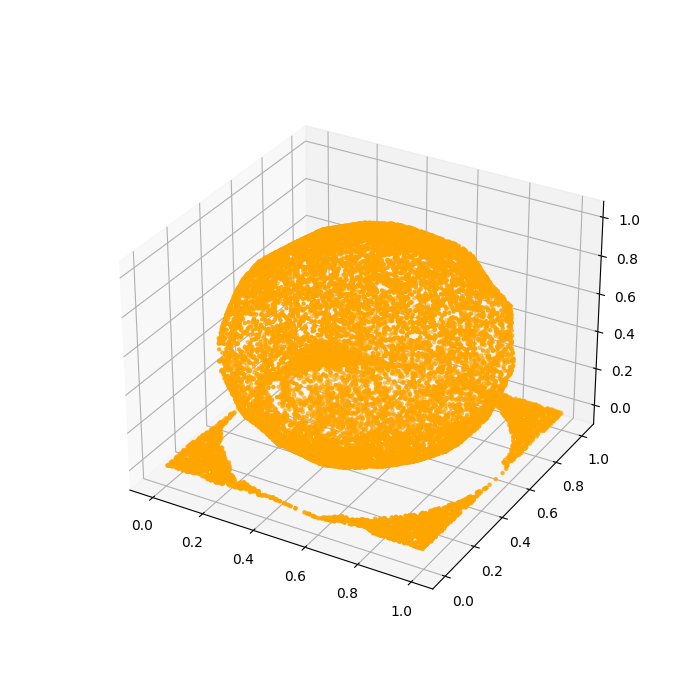

In [387]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=5)

plt.show()

In [ ]:
# Not too bad !
# Possible ways to do bette : 
#   - more points 
#   - more training
#   - wider and deeper NN 

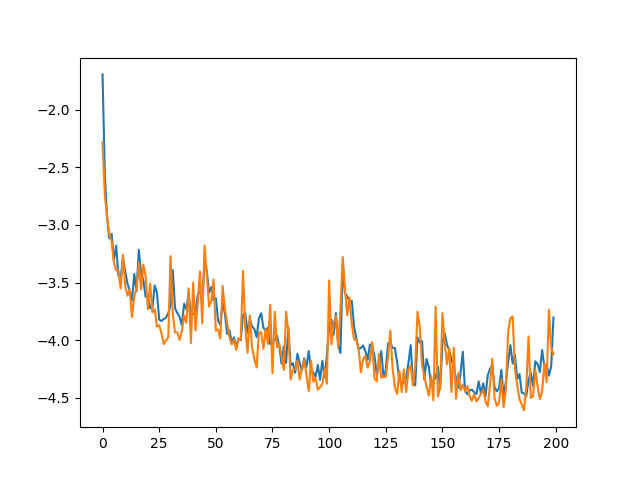

In [390]:
plt.figure()
plt.plot(np.log(history_sphere.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere.history["val_loss"])/np.log(10))
plt.show()

In [409]:
# Création de l'auto-encodeur
input_dim = 3  # Points de l'hélice (x, y, z)
latent_dim = 2  # Nous voulons réduire à une seule variable (t)

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  # Réduire à une dimension (t)

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  # Reconstruire (x, y, z)

# Modèle auto-encodeur
autoencoder_deep = models.Model(inputs, decoded)
autoencoder_deep.compile(optimizer='adam', loss='mse')

In [410]:
autoencoder_deep.summary()

Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,677 (10.46 KB)

 Trainable params: 2,677 (10.46 KB)

 Non-trainable params: 0 (0.00 B)

In [411]:
history_sphere_deep = autoencoder_deep.fit(data_train, data_train, epochs=500, batch_size=1000, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2030 - val_loss: 0.0512
Epoch 2/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0441 - val_loss: 0.0288
Epoch 3/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0240 - val_loss: 0.0086
Epoch 4/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078 - val_loss: 0.0052
Epoch 5/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 6/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 7/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 8/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 9/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 11/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 12/500
162/162 ━━━━━━━━━━━━━━━━━━━━

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8882e-04 - val_loss: 3.8129e-04
Epoch 66/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0511e-04 - val_loss: 3.8727e-04
Epoch 67/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0295e-04 - val_loss: 4.3538e-04
Epoch 68/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0033e-04 - val_loss: 4.5570e-04
Epoch 69/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8007e-04 - val_loss: 4.1378e-04
Epoch 70/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8198e-04 - val_loss: 5.7314e-04
Epoch 71/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8701e-04 - val_loss: 3.6957e-04
Epoch 72/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3265e-04 - val_loss: 3.8999e-04
Epoch 73/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6750e-04 - val_loss: 3.9873e-04
Epoch 74/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7159e-04 - val_loss: 3.6685e-04
Epoch 75/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Epoch 128/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7200e-04 - val_loss: 2.3667e-04
Epoch 129/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3950e-04 - val_loss: 2.4983e-04
Epoch 130/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5086e-04 - val_loss: 2.6816e-04
Epoch 131/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4255e-04 - val_loss: 2.6625e-04
Epoch 132/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6421e-04 - val_loss: 2.5806e-04
Epoch 133/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4169e-04 - val_loss: 2.6060e-04
Epoch 134/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6314e-04 - val_loss: 3.5055e-04
Epoch 135/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9568e-04 - val_loss: 2.4462e-04
Epoch 136/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5247e-04 - val_loss: 2.7856e-04
Epoch 137/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5172e-04 - val_loss: 2.3628e-04
Epoch 138/500
162/162 ━━━━━━━━

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2307e-04 - val_loss: 1.9368e-04
Epoch 191/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5222e-04 - val_loss: 4.9841e-04
Epoch 192/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4907e-04 - val_loss: 2.8541e-04
Epoch 193/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2528e-04 - val_loss: 2.7752e-04
Epoch 194/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1104e-04 - val_loss: 2.4345e-04
Epoch 195/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0339e-04 - val_loss: 2.0150e-04
Epoch 196/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8615e-04 - val_loss: 2.0027e-04
Epoch 197/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9212e-04 - val_loss: 1.8073e-04
Epoch 198/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9336e-04 - val_loss: 1.8613e-04
Epoch 199/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4970e-04 - val_loss: 1.8770e-04
Epoch 200/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8107e-04 - val_loss: 1.8799e-04
Epoch 253/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9983e-04 - val_loss: 1.5934e-04
Epoch 254/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8122e-04 - val_loss: 1.8821e-04
Epoch 255/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4787e-04 - val_loss: 1.9812e-04
Epoch 256/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7652e-04 - val_loss: 1.8112e-04
Epoch 257/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1580e-04 - val_loss: 1.6517e-04
Epoch 258/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3850e-04 - val_loss: 1.7591e-04
Epoch 259/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6899e-04 - val_loss: 2.1994e-04
Epoch 260/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8113e-04 - val_loss: 1.7436e-04
Epoch 261/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6020e-04 - val_loss: 1.8672e-04
Epoch 262/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5960e-04 - val_loss: 1.2535e-04
Epoch 315/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2876e-04 - val_loss: 1.4458e-04
Epoch 316/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6055e-04 - val_loss: 1.1880e-04
Epoch 317/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5595e-04 - val_loss: 1.8464e-04
Epoch 318/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3361e-04 - val_loss: 1.4124e-04
Epoch 319/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0289e-04 - val_loss: 1.8866e-04
Epoch 320/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2359e-04 - val_loss: 1.9660e-04
Epoch 321/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6355e-04 - val_loss: 1.9527e-04
Epoch 322/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8576e-04 - val_loss: 3.1515e-04
Epoch 323/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1943e-04 - val_loss: 1.8190e-04
Epoch 324/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6873e-04 - val_loss: 1.1664e-04
Epoch 377/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7010e-04 - val_loss: 1.2983e-04
Epoch 378/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5499e-04 - val_loss: 3.9969e-04
Epoch 379/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0302e-04 - val_loss: 1.4442e-04
Epoch 380/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5874e-04 - val_loss: 2.1091e-04
Epoch 381/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5801e-04 - val_loss: 2.4672e-04
Epoch 382/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5777e-04 - val_loss: 3.9363e-04
Epoch 383/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2544e-04 - val_loss: 3.3653e-04
Epoch 384/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1923e-04 - val_loss: 1.3590e-04
Epoch 385/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1075e-04 - val_loss: 9.3830e-05
Epoch 386/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0690e-05 - val_loss: 4.0697e-05
Epoch 439/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8371e-05 - val_loss: 3.6660e-05
Epoch 440/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7787e-05 - val_loss: 3.7631e-05
Epoch 441/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3872e-05 - val_loss: 4.9052e-05
Epoch 442/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9411e-05 - val_loss: 4.0400e-05
Epoch 443/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1641e-05 - val_loss: 3.5034e-05
Epoch 444/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6745e-05 - val_loss: 3.6195e-05
Epoch 445/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.3606e-05 - val_loss: 3.4142e-05
Epoch 446/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5780e-05 - val_loss: 3.6637e-05
Epoch 447/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6964e-05 - val_loss: 4.2116e-05
Epoch 448/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9881e-05 - val_loss: 3.1037e-05


In [415]:
encoder_deep = models.Model(inputs, encoded)

In [416]:
encoded_points_deep = encoder_deep.predict(data_test)  
reconstructed_points_deep = autoencoder_deep.predict(data_test)  

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


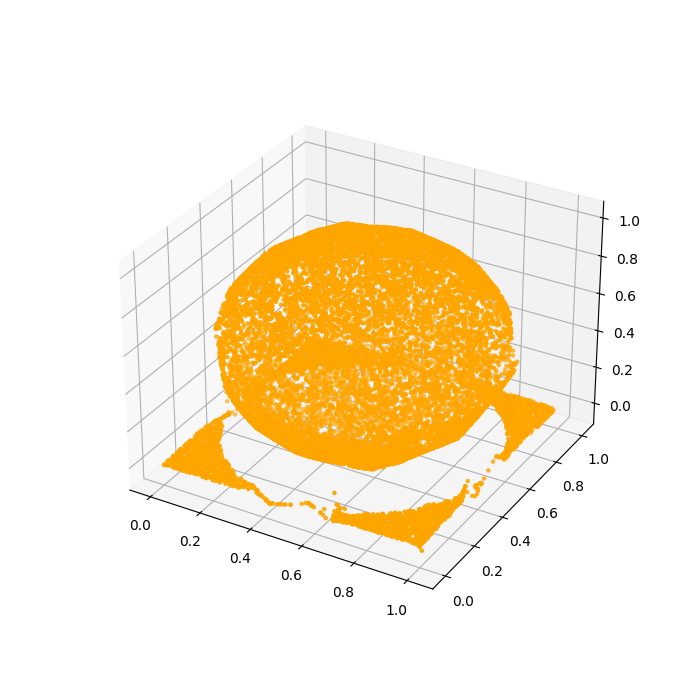

In [418]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points_deep[:,0],reconstructed_points_deep[:,1],reconstructed_points_deep[:,2],c="orange",s=5)

plt.show()

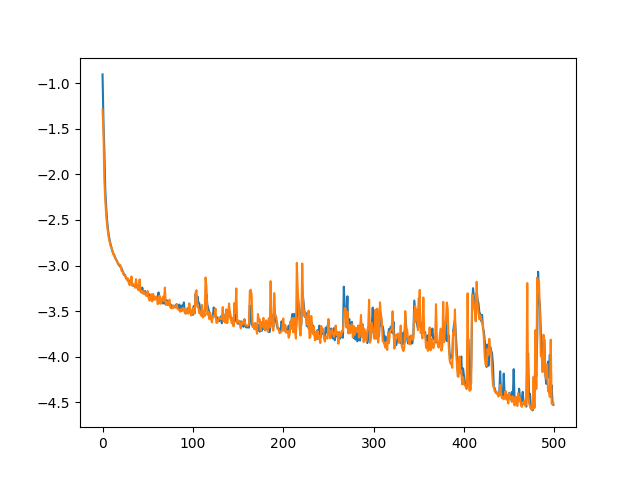

In [420]:
plt.figure()
plt.plot(np.log(history_sphere_deep.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere_deep.history["val_loss"])/np.log(10))
plt.show()

In [ ]:
# not too bad. Let's train it for another 500 epochs 

In [421]:
history_sphere_deep1 = autoencoder_deep.fit(data_train, data_train, epochs=500, batch_size=1000, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8791e-05 - val_loss: 2.9558e-05
Epoch 2/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8669e-05 - val_loss: 2.9305e-05
Epoch 3/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1748e-05 - val_loss: 2.9039e-05
Epoch 4/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5711e-05 - val_loss: 2.8342e-05
Epoch 5/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8330e-05 - val_loss: 2.7425e-05
Epoch 6/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6726e-05 - val_loss: 2.6227e-05
Epoch 7/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6945e-05 - val_loss: 2.7968e-05
Epoch 8/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7277e-05 - val_loss: 2.9221e-05
Epoch 9/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7372e-05 - val_loss: 3.2702e-05
Epoch 10/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6193e-05 - val_loss: 2.8932e-05
Epoch 11/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7162e-05 - val_loss: 2.5962e-05
Epoch 65/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7937e-05 - val_loss: 2.6739e-05
Epoch 66/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2742e-05 - val_loss: 2.4443e-05
Epoch 67/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5427e-05 - val_loss: 2.6076e-05
Epoch 68/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0475e-05 - val_loss: 2.5269e-05
Epoch 69/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5277e-05 - val_loss: 2.6704e-05
Epoch 70/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6274e-05 - val_loss: 2.8291e-05
Epoch 71/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6217e-05 - val_loss: 2.7384e-05
Epoch 72/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6508e-05 - val_loss: 2.4222e-05
Epoch 73/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3444e-05 - val_loss: 2.3231e-05
Epoch 74/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Epoch 127/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9040e-04 - val_loss: 1.5701e-04
Epoch 128/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5794e-04 - val_loss: 1.8816e-04
Epoch 129/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9368e-04 - val_loss: 1.4388e-04
Epoch 130/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7781e-04 - val_loss: 2.3934e-04
Epoch 131/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2716e-04 - val_loss: 2.1325e-04
Epoch 132/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8930e-04 - val_loss: 1.7478e-04
Epoch 133/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0239e-04 - val_loss: 1.9288e-04
Epoch 134/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2074e-04 - val_loss: 2.3951e-04
Epoch 135/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4535e-04 - val_loss: 1.6187e-04
Epoch 136/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2931e-04 - val_loss: 3.3275e-04
Epoch 137/500
162/162 ━━━━━━━━

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7076e-04 - val_loss: 1.7512e-04
Epoch 190/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9213e-04 - val_loss: 1.8913e-04
Epoch 191/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8773e-04 - val_loss: 1.4653e-04
Epoch 192/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5970e-04 - val_loss: 1.1860e-04
Epoch 193/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8020e-04 - val_loss: 1.2057e-04
Epoch 194/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4473e-04 - val_loss: 1.8795e-04
Epoch 195/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6222e-04 - val_loss: 3.5290e-04
Epoch 196/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0886e-04 - val_loss: 2.2807e-04
Epoch 197/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0114e-04 - val_loss: 1.5479e-04
Epoch 198/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1414e-04 - val_loss: 2.5047e-04
Epoch 199/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6987e-04 - val_loss: 1.6618e-04
Epoch 252/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5684e-04 - val_loss: 1.5203e-04
Epoch 253/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5588e-04 - val_loss: 1.0050e-04
Epoch 254/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1392e-04 - val_loss: 1.3333e-04
Epoch 255/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5489e-04 - val_loss: 1.0245e-04
Epoch 256/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1772e-04 - val_loss: 1.0768e-04
Epoch 257/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.5838e-05 - val_loss: 8.7426e-05
Epoch 258/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.6040e-05 - val_loss: 1.9221e-04
Epoch 259/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6040e-04 - val_loss: 1.5618e-04
Epoch 260/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3478e-04 - val_loss: 6.1221e-05
Epoch 261/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1730e-05 - val_loss: 8.2570e-05
Epoch 314/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.6500e-05 - val_loss: 5.7858e-05
Epoch 315/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0023e-04 - val_loss: 0.0013
Epoch 316/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.3800e-04 - val_loss: 6.1549e-04
Epoch 317/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6889e-04 - val_loss: 4.4432e-04
Epoch 318/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8966e-04 - val_loss: 0.0013
Epoch 319/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3597e-04 - val_loss: 2.1389e-04
Epoch 320/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7402e-04 - val_loss: 1.2100e-04
Epoch 321/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5384e-04 - val_loss: 1.4831e-04
Epoch 322/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0300e-04 - val_loss: 3.4907e-04
Epoch 323/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7202e-05 - val_loss: 8.3634e-05
Epoch 376/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5709e-04 - val_loss: 9.5425e-05
Epoch 377/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8436e-05 - val_loss: 6.6548e-05
Epoch 378/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.4395e-05 - val_loss: 5.0846e-05
Epoch 379/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.2415e-05 - val_loss: 6.6790e-05
Epoch 380/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2053e-05 - val_loss: 5.0324e-05
Epoch 381/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.3142e-05 - val_loss: 8.4953e-05
Epoch 382/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2439e-04 - val_loss: 7.6014e-05
Epoch 383/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.3233e-05 - val_loss: 1.1827e-04
Epoch 384/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1295e-04 - val_loss: 6.6501e-05
Epoch 385/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6631e-04 - val_loss: 1.9481e-04
Epoch 438/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7587e-04 - val_loss: 9.0709e-05
Epoch 439/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2774e-04 - val_loss: 1.8187e-04
Epoch 440/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2209e-04 - val_loss: 1.5427e-04
Epoch 441/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2838e-04 - val_loss: 1.2083e-04
Epoch 442/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1580e-04 - val_loss: 2.0856e-04
Epoch 443/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2244e-04 - val_loss: 4.2509e-04
Epoch 444/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7317e-04 - val_loss: 1.0694e-04
Epoch 445/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8292e-05 - val_loss: 7.2591e-05
Epoch 446/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2796e-04 - val_loss: 1.6709e-04
Epoch 447/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0485e-04 - val_loss: 9.0721e-05
Epoch 500/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4635e-05 - val_loss: 1.9642e-04


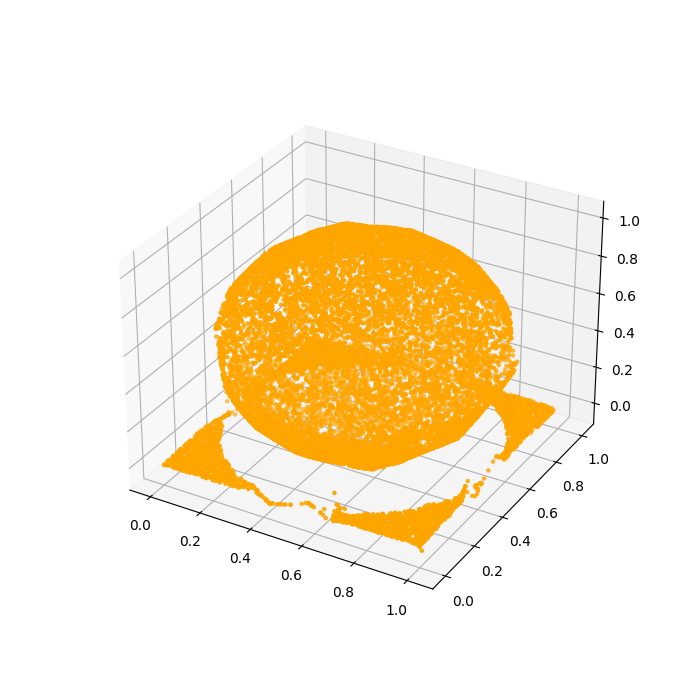

In [425]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points_deep[:,0],reconstructed_points_deep[:,1],reconstructed_points_deep[:,2],c="orange",s=5)

plt.show()

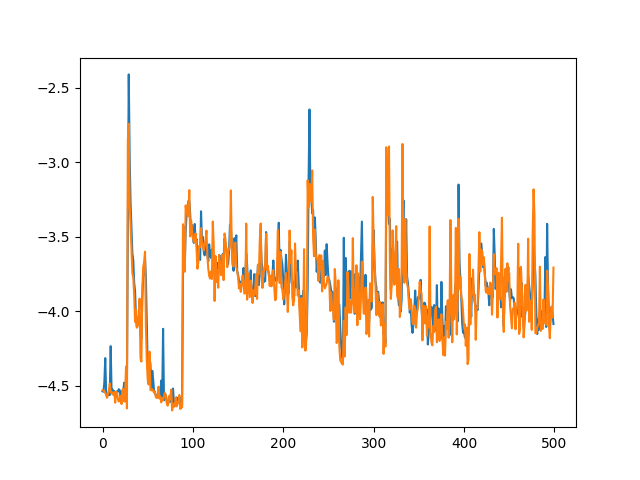

In [424]:
plt.figure()
plt.plot(np.log(history_sphere_deep1.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere_deep1.history["val_loss"])/np.log(10))
plt.show()

In [427]:
# Does not look particularly better ... Maybe recquires another architecture

In [428]:
# Gabriel test potential 

In [449]:
import numpy as np 
import os 
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

def triangular_plot(chains,save='None'):
    data=chains
    nsteps,ndim=chains.shape
    fig = plt.figure(figsize=(8,8))
    fig.set(facecolor = "white")
    for i in range(ndim):
        ax = fig.add_subplot(ndim,ndim,i*ndim+i+1)
        ax.hist(data[:,i], 100, color="k", histtype="step")
        ax.set_title(f"x{i+1}")
    for i in range(ndim):
        for j in range(i):
            plt.subplot(ndim,ndim,ndim*i+j+1)
            counts,xbins,ybins,image = plt.hist2d(data[:,j],data[:,i],bins=100
                                      ,norm=LogNorm()
                                      , cmap = plt.cm.rainbow)
            plt.colorbar()
            plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
            linewidths=0.5, cmap = plt.cm.rainbow, levels = [1,100,1000,10000])
    if save != 'None':
        plt.savefig(save,transparent=False)
        plt.show()
    else: 
        plt.show()

def triangular_plot_slopes(chains,save='None'):
    data=chains.numpy()
    nsteps,ndim=chains.shape
    fig = plt.figure(figsize=(20,20))
    fig.set(facecolor = "white")
    for i in range(ndim):
        for j in range(i):
            ax=fig.add_subplot(ndim,ndim,ndim*i+j+1)
            #those_slope0=np.extract(np.abs(data[:,0])>0.2,data[:,i]/data[:,j])
            those_slope0=data[:,i]/data[:,j]
            those_slope=np.extract(np.abs(those_slope0)<10,those_slope0)
            ax.hist(those_slope,bins=100)
            ax.set_title(f"x{j+1}/x{i+1}")
            #ax.set_ylabel(f"x{i}")
    if save != 'None':
        plt.savefig(save,transparent=False)
        plt.show()
    else: 
        plt.show()

In [438]:
# compute (||∇V||^2)
def grad_norm_squared(V, x ,factor=1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    norm_squared = tf.reduce_sum(gradients**2, axis=1)  # ||∇V||^2 at each point
    return norm_squared * factor

def get_grad(V, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    return gradients

In [439]:
def VHiggs(x):
    x1,x2,x3=tf.split(x, 3, axis=1)
    return x1**2*(x1**2+x2**2-1)**2

In [467]:
# randomly initialize the points
n_points = 100000
#xHiggs = tf.Variable(4*np.random.rand(n_points, 4)-2, dtype=tf.float32)
#historyHiggs = []

xHiggs = tf.Variable(4*np.random.rand(n_points, 3)-2, dtype=tf.float32)
historyHiggs = []

In [468]:
# Oprimizer for the gradient descent

init_alpha=10**(-3)
alpha = init_alpha

optimizer = tf.optimizers.Adam(learning_rate=alpha)
#optimizer = tf.optimizers.SGD(learning_rate=init_alpha,momentum=0.0)

# Learning loop 
loss_prev_step=10**8

#update_alpha = False
update_opt = True
for step in range(3000):  
    with tf.GradientTape() as tape:
        loss = tf.reduce_sum(grad_norm_squared(VHiggs, xHiggs)) # minimize ||∇V||^2 for all points
    
    # Compute ||∇V||^2 with respect to x
    gradients = tape.gradient(loss, [xHiggs])
    
    if update_opt and step % 200 ==0 :
        print("Reinitializing the optimizer")
        optimizer = tf.optimizers.Adam(learning_rate=init_alpha)
    
    if step == 2001:
        update_opt = False 
        optimizer.learning_rate.assign(0.0001)
        
    # Apply gradient descent for all points
    optimizer.apply_gradients(zip(gradients, [xHiggs]))
    
    historyHiggs.append(loss)
    
    if step % 10 == 0:
        print(f"""Step {step}: ||∇V||^2 = {loss.numpy()} with learning rate {optimizer.get_config()["learning_rate"]}""")
        
    if np.log(loss.numpy())/np.log(10)<-10: 
        print("Converged enough") 
        print(f"Step {step}: ||∇V||^2 = {loss.numpy()}")
        break

Reinitializing the optimizer
Step 0: ||∇V||^2 = 709526016.0 with learning rate 0.0010000000474974513
Step 10: ||∇V||^2 = 664627520.0 with learning rate 0.0010000000474974513
Step 20: ||∇V||^2 = 622747520.0 with learning rate 0.0010000000474974513
Step 30: ||∇V||^2 = 583979328.0 with learning rate 0.0010000000474974513
Step 40: ||∇V||^2 = 548253440.0 with learning rate 0.0010000000474974513
Step 50: ||∇V||^2 = 515391648.0 with learning rate 0.0010000000474974513
Step 60: ||∇V||^2 = 485165792.0 with learning rate 0.0010000000474974513
Step 70: ||∇V||^2 = 457337984.0 with learning rate 0.0010000000474974513
Step 80: ||∇V||^2 = 431681280.0 with learning rate 0.0010000000474974513
Step 90: ||∇V||^2 = 407988096.0 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 386071872.0 with learning rate 0.0010000000474974513
Step 110: ||∇V||^2 = 365766272.0 with learning rate 0.0010000000474974513
Step 120: ||∇V||^2 = 346923008.0 with learning rate 0.0010000000474974513
Step 130: ||∇V||^2 =

Step 1100: ||∇V||^2 = 207829.859375 with learning rate 0.0010000000474974513
Step 1110: ||∇V||^2 = 188508.015625 with learning rate 0.0010000000474974513
Step 1120: ||∇V||^2 = 171583.1875 with learning rate 0.0010000000474974513
Step 1130: ||∇V||^2 = 156686.28125 with learning rate 0.0010000000474974513
Step 1140: ||∇V||^2 = 143515.46875 with learning rate 0.0010000000474974513
Step 1150: ||∇V||^2 = 131822.265625 with learning rate 0.0010000000474974513
Step 1160: ||∇V||^2 = 121400.5625 with learning rate 0.0010000000474974513
Step 1170: ||∇V||^2 = 112078.421875 with learning rate 0.0010000000474974513
Step 1180: ||∇V||^2 = 103711.46875 with learning rate 0.0010000000474974513
Step 1190: ||∇V||^2 = 96177.8828125 with learning rate 0.0010000000474974513
Reinitializing the optimizer
Step 1200: ||∇V||^2 = 89374.2734375 with learning rate 0.0010000000474974513
Step 1210: ||∇V||^2 = 74364.046875 with learning rate 0.0010000000474974513
Step 1220: ||∇V||^2 = 61988.90625 with learning rate 0.

Step 2100: ||∇V||^2 = 3.0100084131845506e-06 with learning rate 9.999999747378752e-05
Step 2110: ||∇V||^2 = 1.1222401781196822e-06 with learning rate 9.999999747378752e-05
Step 2120: ||∇V||^2 = 3.662588596853311e-07 with learning rate 9.999999747378752e-05
Step 2130: ||∇V||^2 = 1.0816613382758078e-07 with learning rate 9.999999747378752e-05
Step 2140: ||∇V||^2 = 3.616801080852383e-08 with learning rate 9.999999747378752e-05
Step 2150: ||∇V||^2 = 1.4199931896996532e-08 with learning rate 9.999999747378752e-05
Step 2160: ||∇V||^2 = 6.946793806861251e-09 with learning rate 9.999999747378752e-05
Step 2170: ||∇V||^2 = 3.4212519484100312e-09 with learning rate 9.999999747378752e-05
Step 2180: ||∇V||^2 = 2.0536758960076895e-09 with learning rate 9.999999747378752e-05
Step 2190: ||∇V||^2 = 1.6244539047249873e-09 with learning rate 9.999999747378752e-05
Step 2200: ||∇V||^2 = 1.5502958916613352e-09 with learning rate 9.999999747378752e-05
Step 2210: ||∇V||^2 = 1.4838003048467385e-09 with learnin

In [469]:
for i in range(15):
    print(f"Number of points with ||∇V||^2 > {10**(-i)} : {sum(tf.reduce_sum(get_grad(VHiggs,xHiggs)**2,axis=1).numpy()>10**(-i))}")
    

Number of points with ||∇V||^2 > 1 : 0
Number of points with ||∇V||^2 > 0.1 : 0
Number of points with ||∇V||^2 > 0.01 : 0
Number of points with ||∇V||^2 > 0.001 : 0
Number of points with ||∇V||^2 > 0.0001 : 0
Number of points with ||∇V||^2 > 1e-05 : 0
Number of points with ||∇V||^2 > 1e-06 : 0
Number of points with ||∇V||^2 > 1e-07 : 0
Number of points with ||∇V||^2 > 1e-08 : 4
Number of points with ||∇V||^2 > 1e-09 : 85
Number of points with ||∇V||^2 > 1e-10 : 444
Number of points with ||∇V||^2 > 1e-11 : 1133
Number of points with ||∇V||^2 > 1e-12 : 2162
Number of points with ||∇V||^2 > 1e-13 : 3488
Number of points with ||∇V||^2 > 1e-14 : 8010


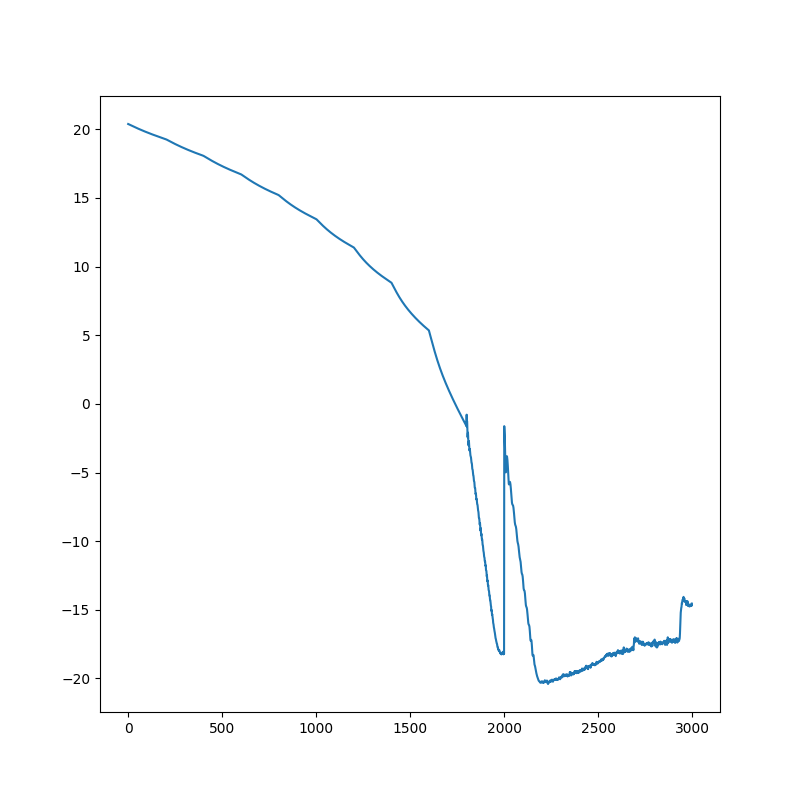

In [470]:
#all_steps = np.linspace(1,len(history),len(history))
plt.figure(figsize=(8,8))
plt.plot(np.log(historyHiggs))
plt.show()

In [471]:
xHiggs.numpy().shape

(100000, 3)

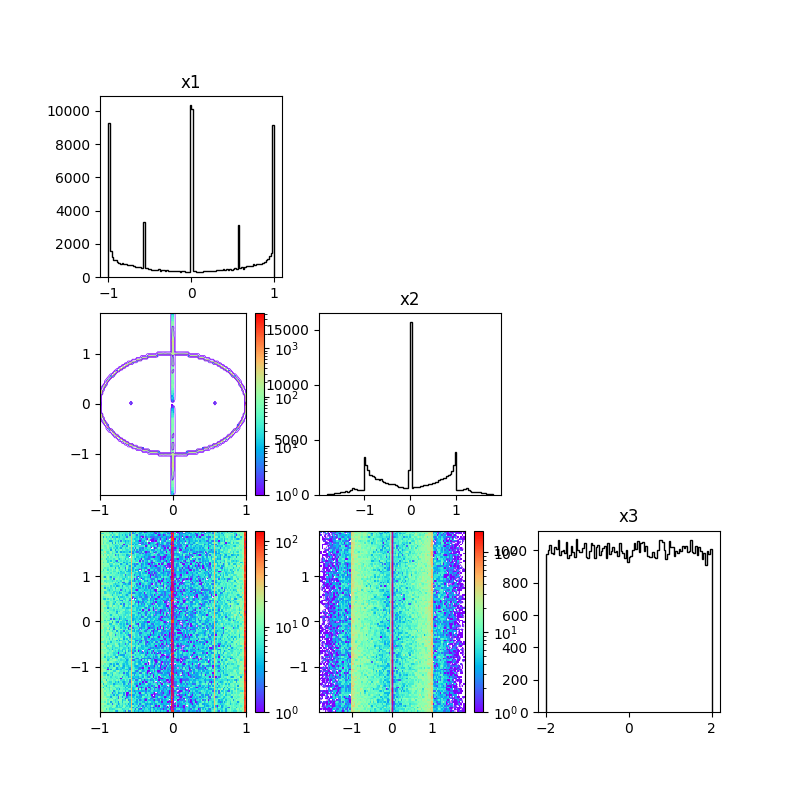

In [472]:
triangular_plot(xHiggs.numpy())

In [473]:
# Can we find back the circle usign autoencoder ? 

In [474]:
# Création de l'auto-encodeur
input_dim = 3  # Points de l'hélice (x, y, z)
latent_dim = 1  # Nous voulons réduire à une seule variable (t)

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  # Réduire à une dimension (t)

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  # Reconstruire (x, y, z)

# Modèle auto-encodeur
autoencoder_deep = models.Model(inputs, decoded)
autoencoder_deep.compile(optimizer='adam', loss='mse')

In [475]:
autoencoder_deep.summary()

Model: "functional_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_43 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 644 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

In [476]:
xHiggs.numpy().shape

(100000, 3)

In [ ]:
history_sphere_Higgs = autoencoder_deep.fit(xHiggs.numpy(), xHiggs.numpy(), epochs=100, batch_size=100, shuffle=True)


Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4657
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3025
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2668
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2473
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2298
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2211
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2149
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2122
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2070
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2003
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1929
Epoch 12/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1858
Epoch 13/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1765
Epoch 14/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1646
Epoch 15/100
10

In [460]:
encoder_deep = models.Model(inputs, encoded)

In [461]:
encoded_points_deep = encoder_deep.predict(xHiggs.numpy())  
reconstructed_points_deep = autoencoder_deep.predict(xHiggs.numpy())  


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


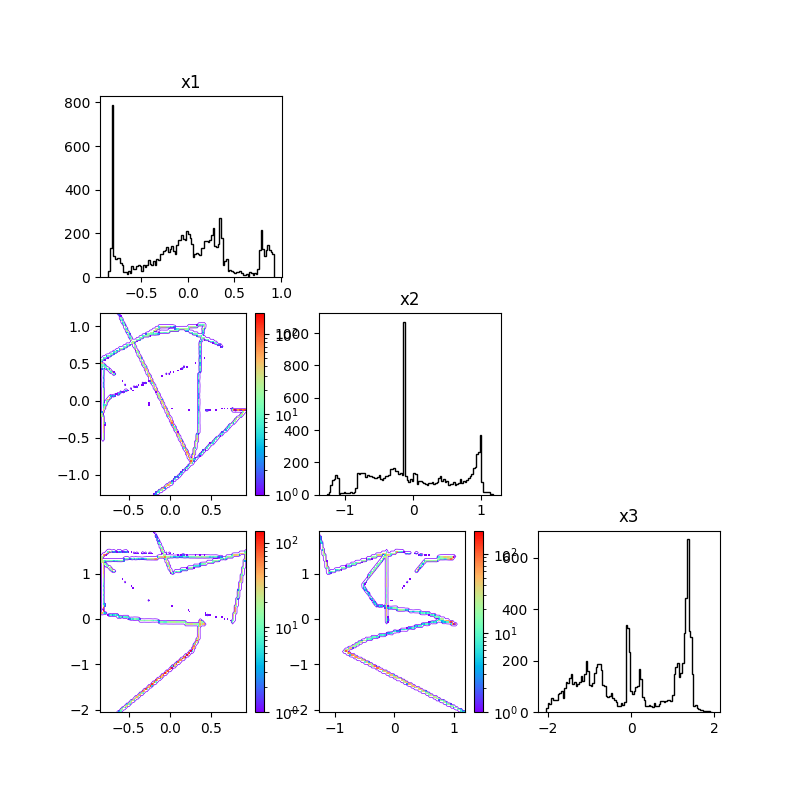

In [463]:
triangular_plot(reconstructed_points_deep)